# Project: Regression Modeling with the Boston Housing Dataset

## Introduction

In this final lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the famous "Boston Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Build many linear models with the Boston housing data using OLS
* Analyze OLS diagnostics for model validity 
* Visually explain the results and interpret the diagnostics from Statsmodels 
* Comment on the goodness of fit for a simple regression model

## Let's get started

### Import necessary libraries and load 'BostonHousing.csv' as a pandas dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
%matplotlib inline
plt.style.use('dark_background')

In [2]:
data = pd.read_csv('BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The columns in the Boston housing data represent the dependent and independent variables. The dependent variable here is the median house value `MEDV`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [4]:
# Record your observations here 
# All of the columns are numeric data, all with the same number of entries. On initial
# inspection, this indicates there are no missing values (will need to check for numeric nulls)
# Each row represents a town, and each column a variable dependent on that town

### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

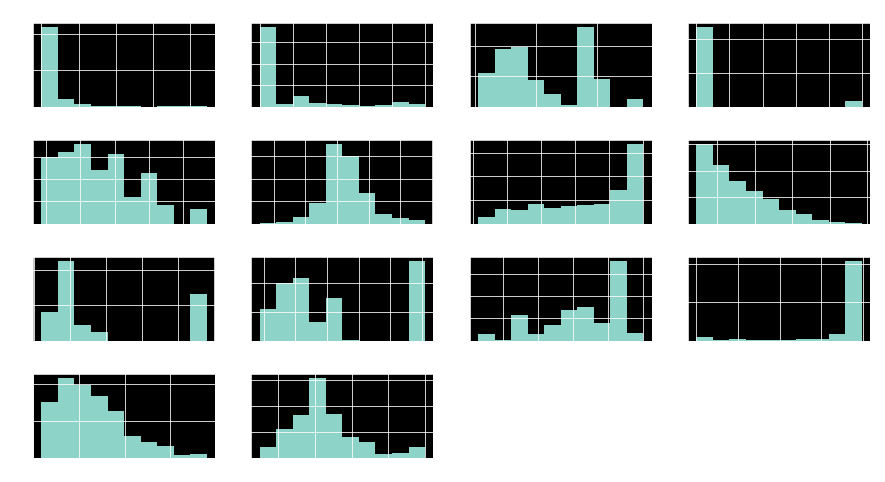

In [5]:
plt.figure(figsize=(15,8))
plt.subplots_adjust(hspace=0.4)
for index, column in enumerate(data):
    ax = plt.subplot(4,4,index+1)
    data[column].hist()
    ax.set_title(column)

In [6]:
# You observations here 
# chas is a categorical 0/1 variable, not a good distribution
# there is a lot of skewness and kurtosis in most variables
# crim, zn, nox, rm, age, dis, ptratio, b, lstat, medv seem to be normal enough to investigate
# the target variable, medv, looks relatively normal with some positive skew and high outliers

Based on this, we preselected some features  for you which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [7]:
df_new = data[['crim', 'dis', 'rm', 'zn', 'age', 'medv']]
df_new.head()

,crim,dis,rm,zn,age,medv
0,0.00632,4.0900,6.575,18.0,65.2,24.0
1,0.02731,4.9671,6.421,0.0,78.9,21.6
2,0.02729,4.9671,7.185,0.0,61.1,34.7
3,0.03237,6.0622,6.998,0.0,45.8,33.4
4,0.06905,6.0622,7.147,0.0,54.2,36.2


### Check for linearity assumption for all chosen features with target variable using scatter plots

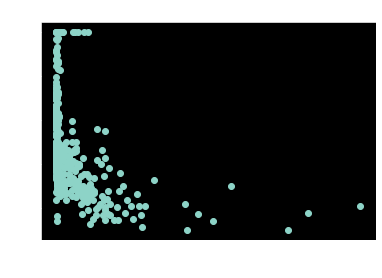

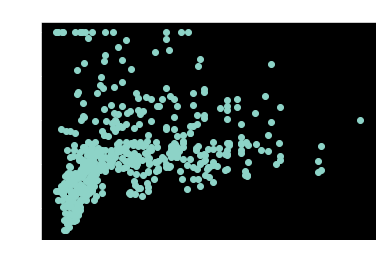

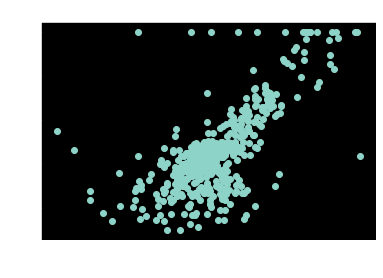

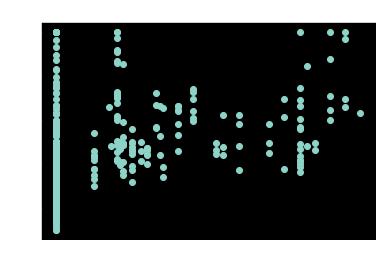

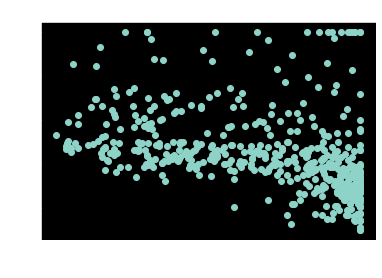

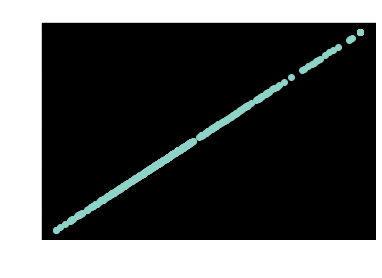

In [8]:
for var in df_new:
    plt.scatter(df_new[var], df_new.medv)
    plt.xlabel(var)
    plt.ylabel('median value')
    plt.title(var)
    plt.show()

In [9]:
# Your observations here 
# There is no totally clean linear relationships to be observed, but there may be some linearity
# between the variables and the target variable medv.
# The most visibly linear relationship is between rm/medv and age/medv, maybe some with dis and zn
# some preprocessing would help to make data more suitable for analysis

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll the dataset untouched and just move on with the regression. The assumptions are _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

In [11]:
plt.style.use('seaborn-whitegrid')

Boston Housing Dataset = Regression Analysis for formula: medv~crim
--------------------------------------------------------------


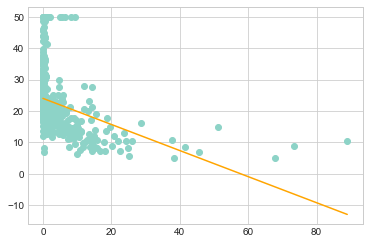

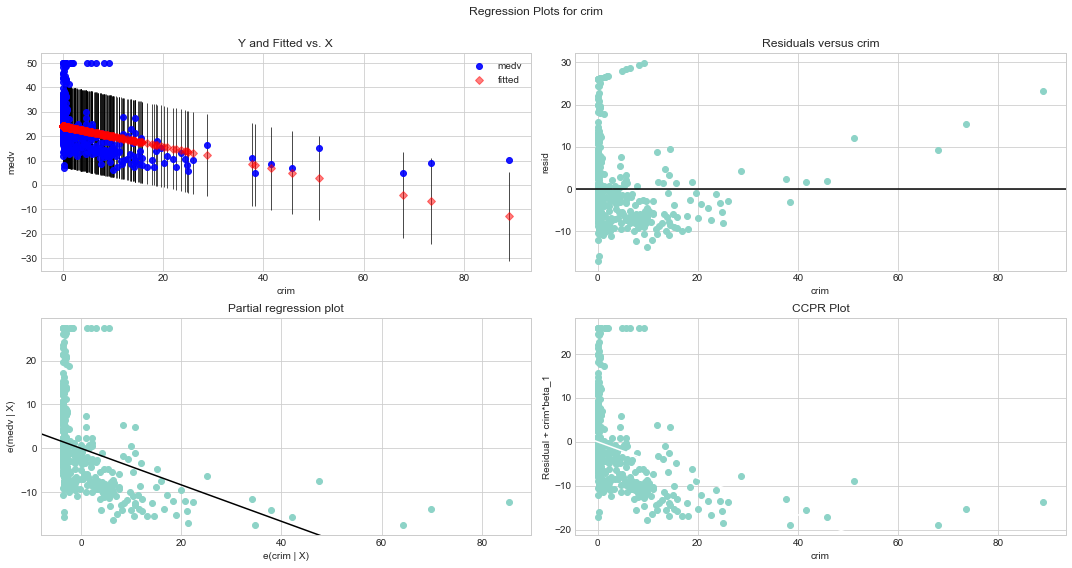

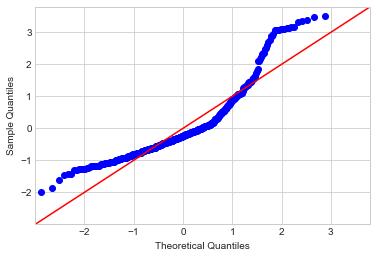

Boston Housing Dataset = Regression Analysis for formula: medv~dis
--------------------------------------------------------------


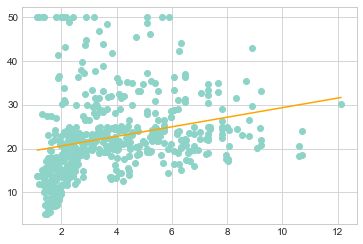

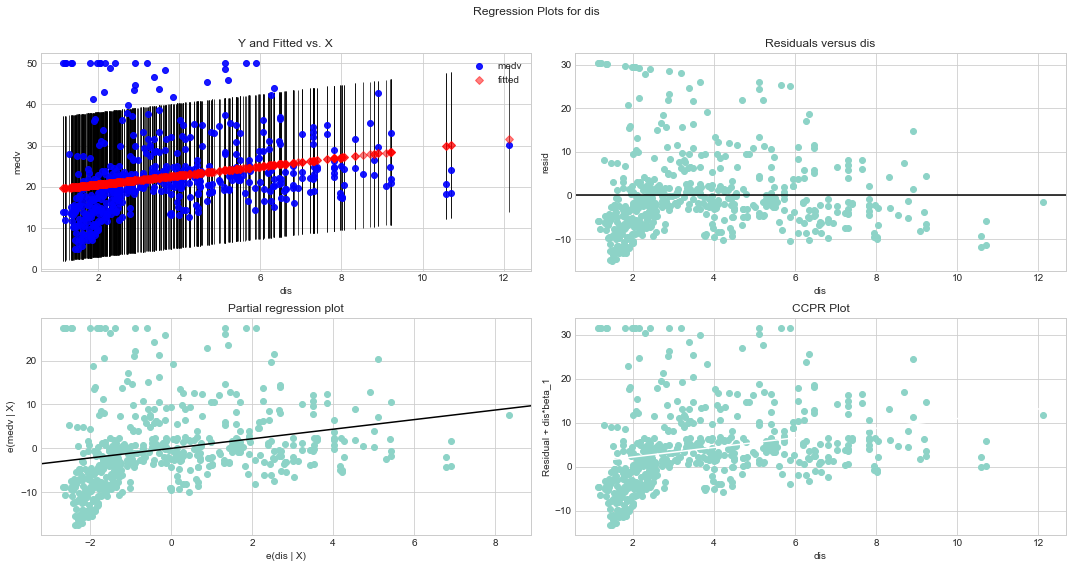

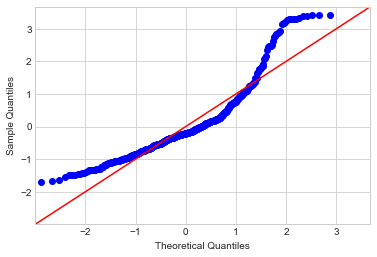

Boston Housing Dataset = Regression Analysis for formula: medv~rm
--------------------------------------------------------------


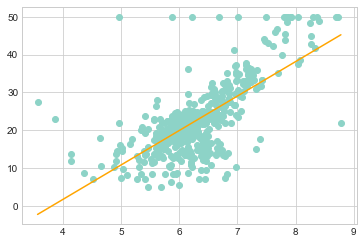

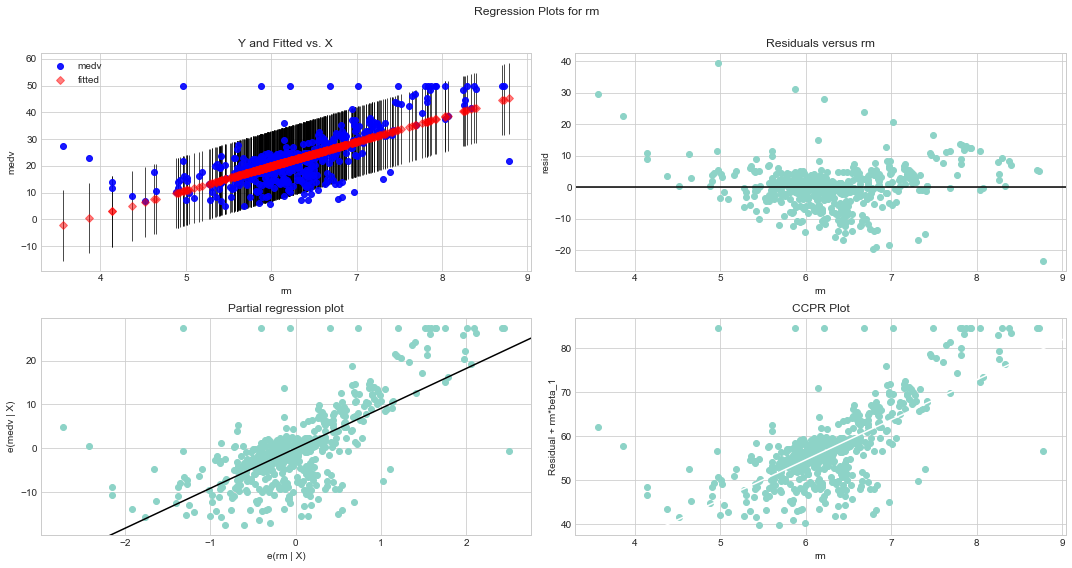

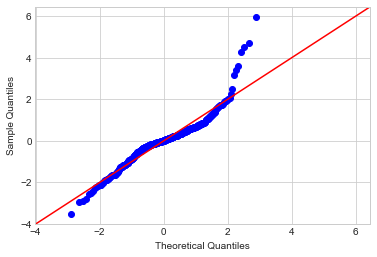

Boston Housing Dataset = Regression Analysis for formula: medv~zn
--------------------------------------------------------------


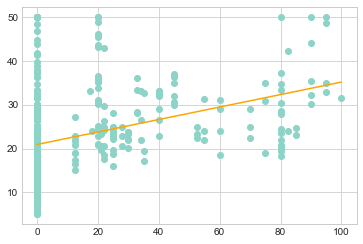

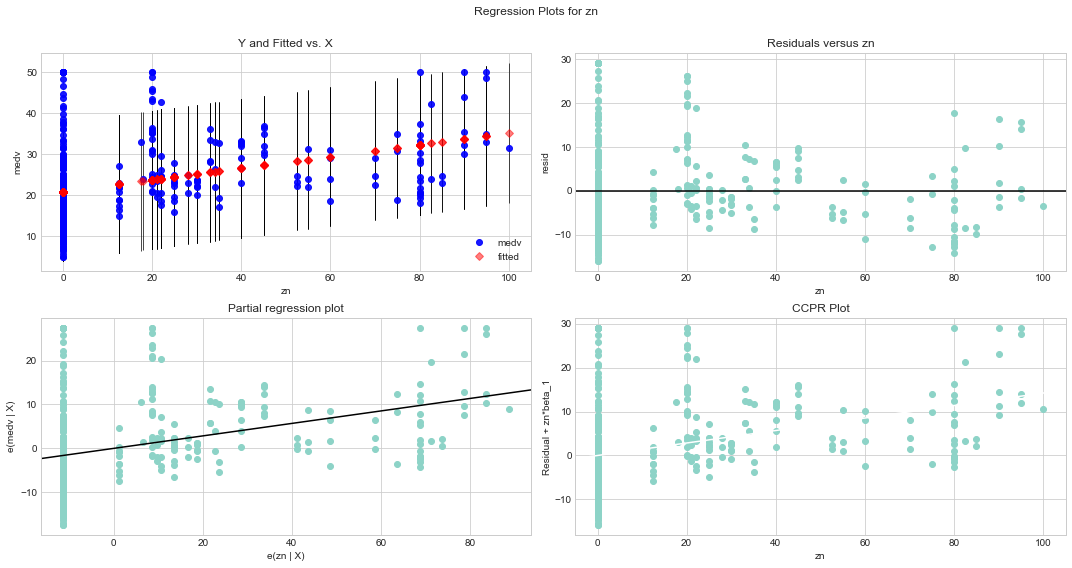

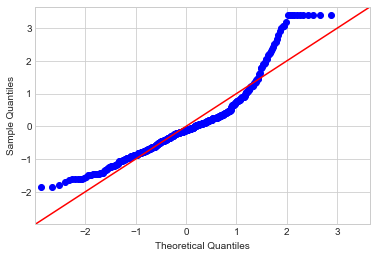

Boston Housing Dataset = Regression Analysis for formula: medv~age
--------------------------------------------------------------


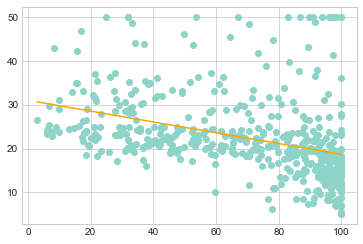

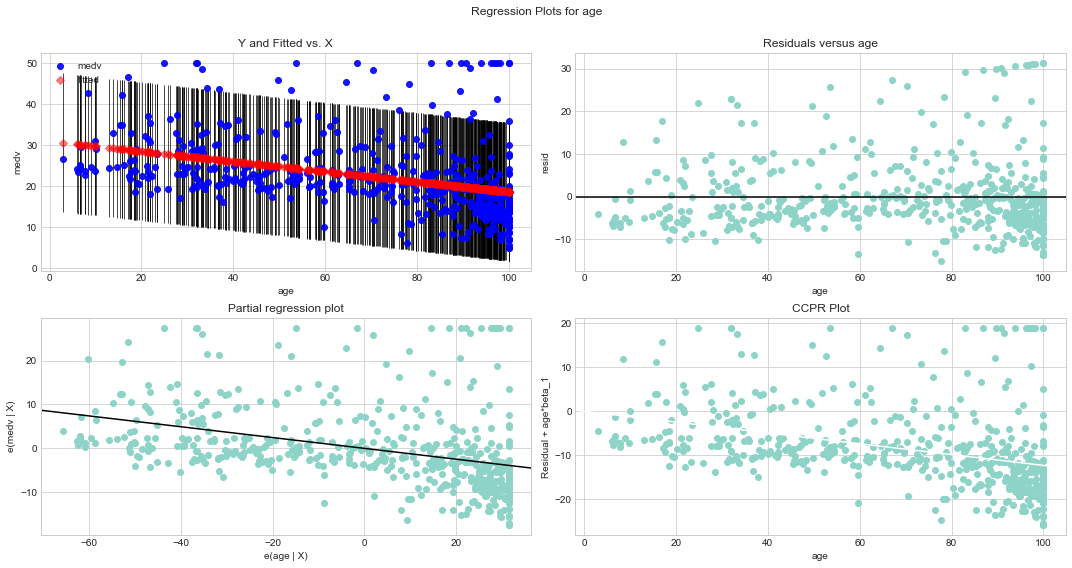

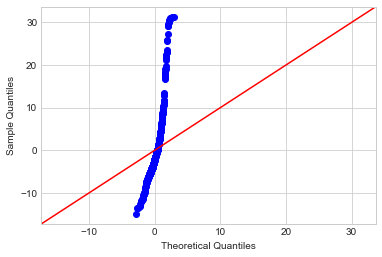

Boston Housing Dataset = Regression Analysis for formula: medv~medv
--------------------------------------------------------------


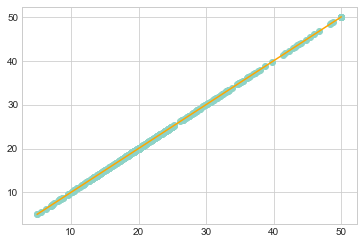

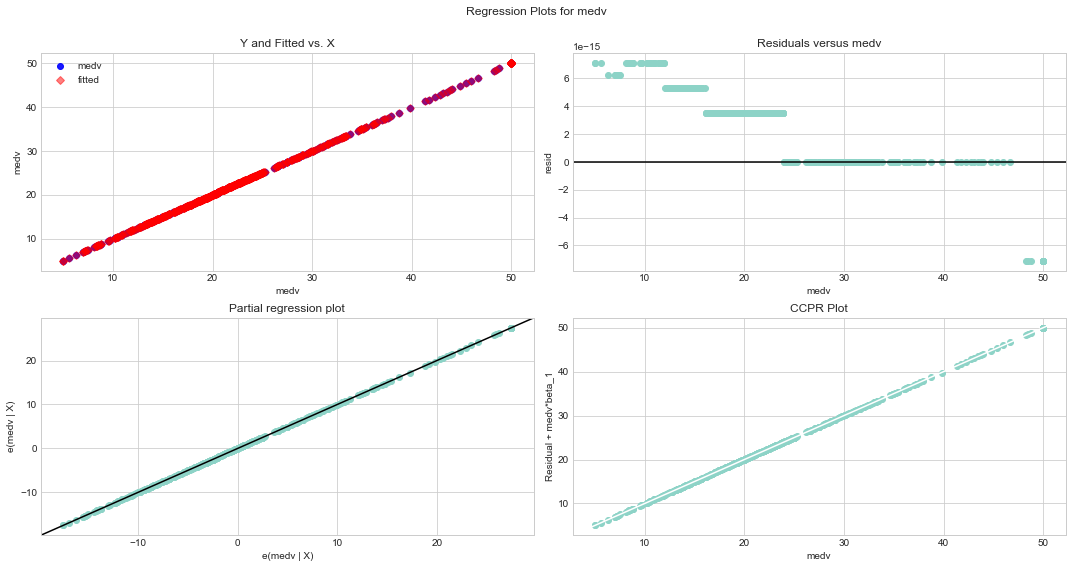

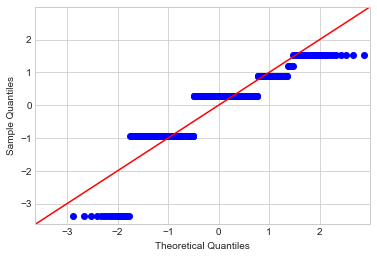

In [17]:
results = [['ind_var','r_squared','intercept','slope','p-value','normality (JB)']]
for col in df_new:
    f = 'medv~'+col
    print(f"Boston Housing Dataset = Regression Analysis for formula: {f}")
    print('--------------------------------------------------------------')
    
    model = smf.ols(formula=f, data=df_new).fit()
    X_new = pd.DataFrame({col: [data[col].min(), data[col].max()]})
    preds = model.predict(X_new)
    plt.scatter(df_new[col], df_new['medv'])
    plt.plot(X_new, preds, c='orange')
    plt.show()
    
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    plt.show()
    
    results.append([col, model.rsquared, model.params[0], model.params[1], model.pvalues[1], 
                   sms.jarque_bera(model.resid)[0]])
    

In [18]:
pd.DataFrame(results)

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,crim,0.15078,24.0331,-0.41519,1.17399e-19,295.404
2,dis,0.0624644,18.3901,1.09161,1.20661e-08,305.104
3,rm,0.483525,-34.6706,9.10211,2.48723e-74,612.449
4,zn,0.129921,20.9176,0.14214,5.71358e-17,262.387
5,age,0.142095,30.9787,-0.123163,1.56998e-18,456.983
6,medv,1,-8.10463e-15,1,0,288.493


In [118]:
#Your observations here 
# None of the Q-Q plots appear to indicate normality in the residuals
# All of the models have a lot of large errors involved, all of the R_squared values are very low
# The highest R_squared value is 0.48 with rm as independent variable, the others are laughably low
# The p-values all seem to be fairly low, however, and the normality scores are looking high

# Despite the lack of reliability and normality in these models, here is what they suggest per variable:

# Crime is negatively related to house values: the higher the crime rate, the less valuable the houses in town
# Q-Q plot for crime does not show clear signs of heteroscedasticity

# Distance to employment centers is positively related to house values, meaning larger distances
# are related to higher home values
# The R_squared value on this model is abominably low, terrible fit, also not normal residuals

# Rooms per house most strong relationship to house value, positive relationship with more rooms
# per house associated with higher house values (there is probably causality here)
# The R_sqared value for this relationship is the highest observed
# No apparent heteroscedasticity from residuals scatter plot for rm
# Q-Q plot for rm is most normal out of all variables, but does have a curve at the high end
# Outliers undoubtedly affecting model here

# There seems to be a slight positive relationship between zn and medv, but it is hard to tell until data
# is cleaned. The level of variance in the data makes for a very low R_squared value, and an unreliable model.
# One would think it logical to assume that more larger residential lots would be associated with
# higher home values, perhaps this will become more clear when data is preprocessed.

# There is a slight negative relationship between age and medv, implying that older houses are
# generally less valuable than newer ones. However, with an R_squared value of just 0.14, the model
# is not very reliable. 
# The Q-Q plot for age/medv is looking way off.

Clearly, the results are not very reliable. The best R-Squared is witnessed with `rm`, so in this analysis, this is uour best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore at multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.